#**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Import Dataset**

In [2]:
#Import Dataset dari google drive
!gdown --id 1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7

Downloading...
From: https://drive.google.com/uc?id=1hsffcmhRqtm6HuXJBl_JrIqNT8R7smq7
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 93.3MB/s]


#**Data Understanding**


In [3]:
df_train = pd.read_csv('kendaraan_train.csv')
df_train.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
df_train.shape

(285831, 12)

In [5]:
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


##**Data Preprocessing**

In [7]:
df_train = df_train.drop(['id', 'Tertarik'], axis=1)
df_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
44435,Pria,51.0,1.0,24.0,0.0,1-2 Tahun,Pernah,27244.0,26.0,77.0
938,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,34097.0,160.0,248.0
106366,Wanita,24.0,1.0,46.0,1.0,< 1 Tahun,Tidak,21010.0,152.0,69.0
128853,Pria,29.0,1.0,23.0,1.0,1-2 Tahun,Pernah,2630.0,156.0,92.0
136498,Wanita,67.0,1.0,8.0,0.0,1-2 Tahun,Tidak,51935.0,152.0,198.0


In [8]:
df_train.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [9]:
df_train.nunique()

Jenis_Kelamin            2
Umur                    66
SIM                      2
Kode_Daerah             53
Sudah_Asuransi           2
Umur_Kendaraan           3
Kendaraan_Rusak          2
Premi                45114
Kanal_Penjualan        151
Lama_Berlangganan      290
dtype: int64

##**Handling Missing Value**

In [10]:
print("Modus SIM", df_train['SIM'].mode())
print("Modus Kode Daerah :  ", df_train['Kode_Daerah'].mode())
print("Modus Jenis Kelamin : ", df_train['Jenis_Kelamin'].mode())
print("Modus Umur Kendaraan : ", df_train['Umur_Kendaraan'].mode())
print("Modus Kendaraan Rusak : ", df_train['Kendaraan_Rusak'].mode())
print("Modus Kanal Penjualan : ", df_train['Kanal_Penjualan'].mode())

Modus SIM 0    1.0
dtype: float64
Modus Kode Daerah :   0    28.0
dtype: float64
Modus Jenis Kelamin :  0    Pria
dtype: object
Modus Umur Kendaraan :  0    1-2 Tahun
dtype: object
Modus Kendaraan Rusak :  0    Pernah
dtype: object
Modus Kanal Penjualan :  0    152.0
dtype: float64


In [11]:
df_train['SIM'] = df_train['SIM'].replace(np.NaN, 1.0)
df_train['Kode_Daerah'] = df_train['Kode_Daerah'].replace(np.NaN, 28.0)
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace(np.NaN, "Pria") 
df_train['Umur'] = df_train['Umur'].replace(np.NaN, df_train['Umur'].mean())
df_train['Sudah_Asuransi'].fillna(method = 'bfill', inplace = True)
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace(np.NaN, "1-2 Tahun")
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace(np.NaN, "Pernah")
df_train['Premi'] = df_train['Premi'].replace(np.NaN, df_train['Premi'].mean())
df_train['Kanal_Penjualan'] = df_train['Kanal_Penjualan'].replace(np.NaN, 152.0)
df_train['Lama_Berlangganan'] = df_train['Lama_Berlangganan'].replace(np.NaN, df_train['Lama_Berlangganan'].mean())

In [12]:
df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [13]:
df_eks = df_train.copy()
df_eks

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


In [14]:
#Export Dataset Setelah Drop Data
df_train.to_csv('data_kendaraan_setelah_handling_missing_value.csv', index=False)

In [26]:
df_eks.to_csv('data_eksperimen.csv', index=False)

# **Data Normalization**


In [15]:
# Normalisasi Data dengan mengubah tipe data dari kolom Jenis_Kelamin,
# Kendaraan_Rusak dan Umur_Kendaraan
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace("Pria", 1.0) 
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace("Wanita", 0) 

df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace("Pernah", 1.0)
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace("Tidak", 0)

df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace("< 1 Tahun", 0)
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace("1-2 Tahun", 1.0)
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace("> 2 Tahun", 2.0)

In [16]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0
2,1.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0
4,1.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0


In [17]:
df_train.to_csv('data_kendaraan_setelah_mengubah_data_kategorikal_menjadi_numerikal.csv', index=False)

In [18]:
# Melakukan normalisasi tiap data pada kolom menggunakan metode Z score
for column in df_train.columns:
    df_train[column] = (df_train[column] -
                           df_train[column].mean()) / df_train[column].std()    
    
df_train.head(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,-1.136620,-0.584494,0.045248,0.504182,1.085734,-1.124496,-1.060574,-0.150052,0.709303,-0.701860
1,0.879798,0.605069,0.045248,0.968525,-0.921033,2.449372,0.942882,-0.283429,-1.587901,0.045499
2,0.879798,-1.179276,0.045248,1.510259,1.085734,-1.124496,-1.060574,0.131421,0.858715,-0.432321
3,-1.136620,1.265937,0.045248,1.665040,-0.921033,0.662438,-1.060574,-1.669851,0.186362,-1.118421
4,0.879798,0.737242,0.045248,0.658963,-0.921033,2.449372,0.942882,0.258515,-0.485990,0.486564


In [19]:
df_train.to_csv('data_kendaraan_setelah_normalisasi_data.csv', index=False)

# **Handling Outliers**


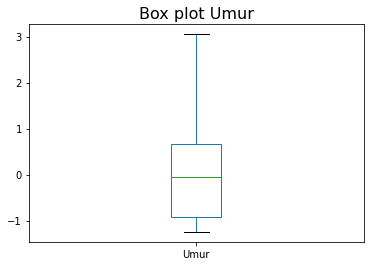

In [20]:
df_train['Umur'].plot(kind='box', figsize=(6, 4))

plt.title('Box plot Umur', size=16)
plt.show()

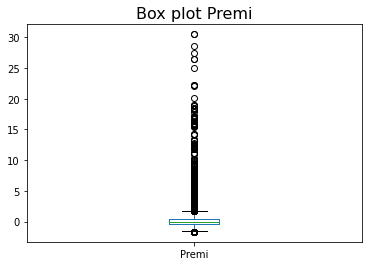

In [21]:
df_train['Premi'].plot(kind='box', figsize=(6, 4))

plt.title('Box plot Premi', size=16)
plt.show()

In [22]:
# Menggunakan IQR untuk menghilangkan outlier pada kolom Premi
data = df_train['Premi']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

for i in range(len(df_train['Premi'])):
   if df_train['Premi'][i] < lwr_bound:
     df_train['Premi'][i] = lwr_bound
   if df_train['Premi'][i] > upr_bound:
     df_train['Premi'][i] = upr_bound

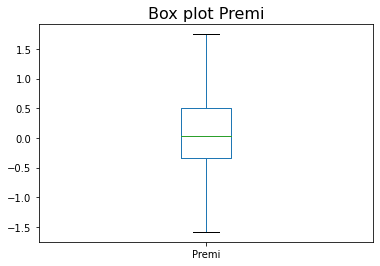

In [23]:
df_train['Premi'].plot(kind='box', figsize=(6, 4))

plt.title('Box plot Premi', size=16)
plt.show()

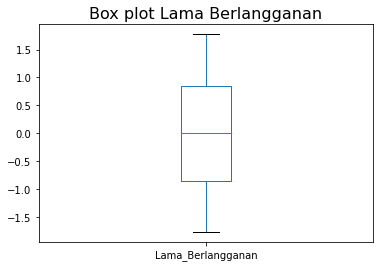

In [24]:
df_train['Lama_Berlangganan'].plot(kind='box', figsize=(6, 4))

plt.title('Box plot Lama Berlangganan', size=16)
plt.show()

In [25]:
df_train.to_csv('data_kendaraan_setelah_handling_outliers.csv', index=False)

# **Data Modelling**

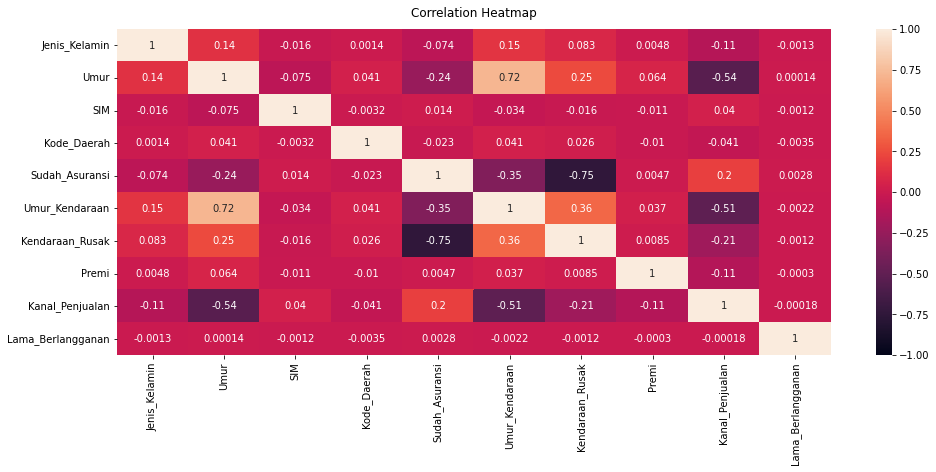

In [ ]:
# Visualisasi heatmap untuk melihat korelasi tiap kolom pada dataset.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Scatter Plot untuk Umur dan Lama Berlangganan

In [ ]:
# Mengambil Kolom Umur dan Lama Berlangganan yang dimasukkan kedalam var data.
data = df_train.loc[:, ['Umur', 'Lama_Berlangganan']]
data.head(2)

,Umur,Lama_Berlangganan
0,-0.584494,-0.701860
1,0.605069,0.045499


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


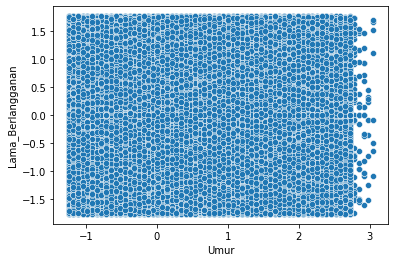

In [ ]:
X = data.values

sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Umur')
plt.ylabel('Lama_Berlangganan')
plt.show()

## Scatter Plot untuk Umur dan Kanal Penjualan

In [ ]:
# Mengambil Kolom Umur dan Kanal Penjualan yang dimasukkan kedalam var data1.
data1 = df_train.loc[:, ['Umur', 'Kanal_Penjualan']]
data1.head(2)

,Umur,Kanal_Penjualan
0,-0.584494,0.709303
1,0.605069,-1.587901


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


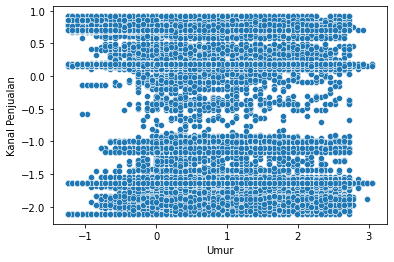

In [ ]:
Y = data1.values

sns.scatterplot(Y[:,0], Y[:, 1])
plt.xlabel('Umur')
plt.ylabel('Kanal Penjualan')
plt.show()

## K-Means

In [ ]:
def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
    # for each observation
    for i, row in enumerate(X):
      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
        # store closest centroid
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


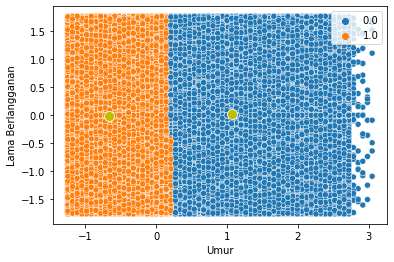

In [ ]:
# Visualisasi klastering dataset dengan k = 2
k = 2
centroids, cluster = kmeans(X, k)
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Umur')
plt.ylabel('Lama Berlangganan')
plt.show()

# **Evaluate**

In [ ]:
# Fungsi untuk mencari WCSS
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [ ]:
cost_list = []
for k in range(2, 9):
    centroids, cluster = kmeans(X, k)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

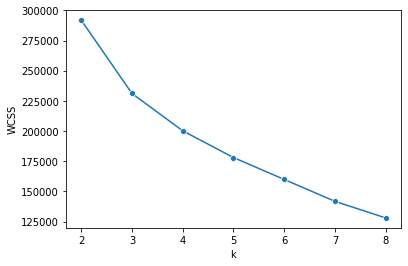

In [ ]:
sns.lineplot(x=range(2,9), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


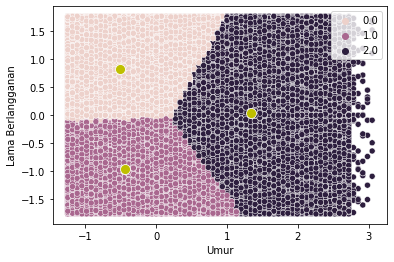

In [ ]:
# Visualisasi klastering dataset dengan k = 3
k = 3
centroids, cluster = kmeans(X, k)
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Umur')
plt.ylabel('Lama Berlangganan')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


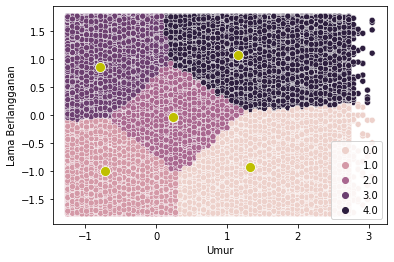

In [ ]:
# Visualisasi klastering dataset dengan k = 5
k = 5
centroids, cluster = kmeans(X, k)
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Umur')
plt.ylabel('Lama Berlangganan')
plt.show()

# Eksperimen
Eksperimen dilakukan tanpa melakukan normalisasi data pada dataset.

In [ ]:
df_eks.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0


In [ ]:
df_eks.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

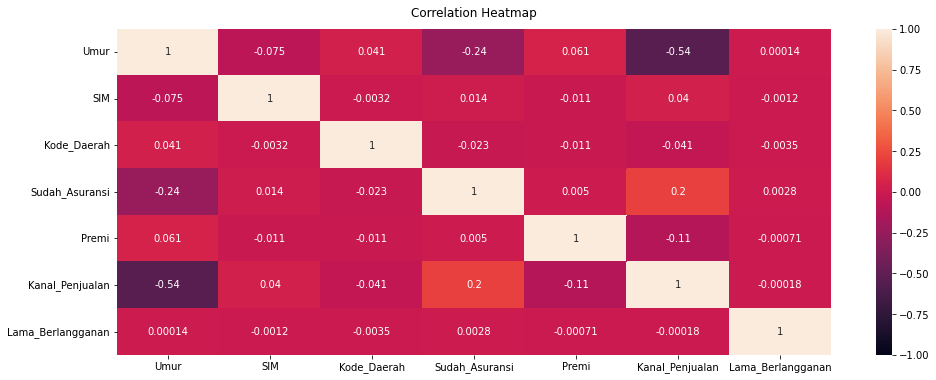

In [ ]:
# Visualisasi heatmap untuk melihat korelasi antara tiap kolom pada data eksperimen
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_eks.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# Mengambil Kolom Umur dan Lama_Berlangganan yang dimasukkan kedalam var data_eks.
data_eks = df_eks.loc[:, ['Umur', 'Lama_Berlangganan']]
data_eks.head(2)

,Umur,Lama_Berlangganan
0,30.0,97.0
1,48.0,158.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


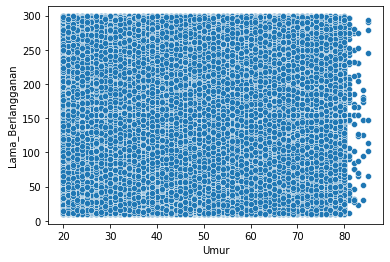

In [ ]:
X_eks = data_eks.values

sns.scatterplot(X_eks[:,0], X_eks[:, 1])
plt.xlabel('Umur')
plt.ylabel('Lama_Berlangganan')
plt.show()

In [ ]:
X_eks.shape

(285831, 2)

In [ ]:
def kmeans_eks(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data_eks.sample(n=k).values
  while diff:
    # for each observation
    for i, row in enumerate(X):
      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
        # store closest centroid
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


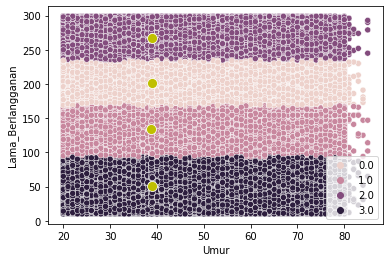

In [ ]:
# Visualisasi klastering data eksperimen dengan k = 4
k = 4
centroids, cluster = kmeans_eks(X_eks, k)
sns.scatterplot(X_eks[:,0], X_eks[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Umur')
plt.ylabel('Lama_Berlangganan')
plt.show()

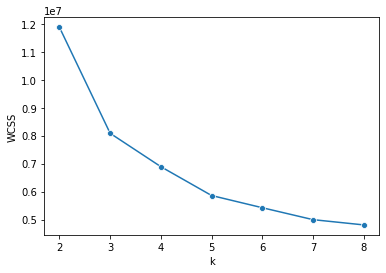

In [ ]:
cost_list_eks = []
for k in range(2, 9):
    centroids, cluster = kmeans_eks(X_eks, k)
    cost = calculate_cost(X_eks, centroids, cluster)
    cost_list_eks.append(cost)

sns.lineplot(x=range(2,9), y=cost_list_eks, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


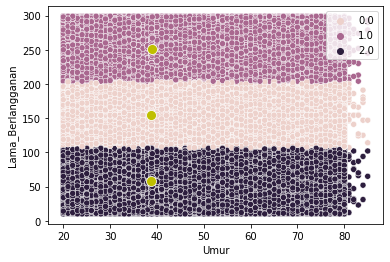

In [ ]:
# Visualisasi klastering data eksperimen dengan k = 3
k = 3
centroids, cluster = kmeans_eks(X_eks, k)
sns.scatterplot(X_eks[:,0], X_eks[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Umur')
plt.ylabel('Lama_Berlangganan')
plt.show()